# **Naive Bayes**

```
Autor : Luis Beltran Palma Ttito
Lugar : Cusco, Perú, 2023.
Proposito : Naive Bayes en la clasificacion de data set de iris
```

El clasificador de Naive Bayes es un algoritmo de aprendizaje automático basado en el teorema de Bayes, que asume la independencia condicional entre las características. Utiliza una estrategia de clasificación probabilística para asignar etiquetas a nuevas instancias en función de la información presente en las características. El clasificador de Naive Bayes se llama "naive" (ingenuo) porque simplifica el problema asumiendo la independencia condicional entre las características, lo cual es una suposición simplificadora pero útil en muchos casos de datos. A pesar de su simplicidad, el clasificador de Naive Bayes es efectivo en una amplia gama de aplicaciones, especialmente en el análisis de texto y clasificación de documentos, donde es ampliamente utilizado. Es rápido, fácil de implementar y funciona bien incluso con conjuntos de datos pequeños. Sin embargo, el clasificador de Naive Bayes puede verse afectado negativamente si las suposiciones de independencia condicional no se cumplen o si hay características altamente correlacionadas en los datos.

**Dataset a procesar: iris.csv**

El conjunto de datos de iris consiste en información sobre 150 muestras de flores de iris de tres especies diferentes: setosa, versicolor y virginica. Para cada muestra se registran cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Estas características se miden en centímetros.

El objetivo del conjunto de datos de iris es clasificar las muestras de flores en función de las especies a las que pertenecen. Esto lo convierte en un problema de clasificación multiclase, donde se intenta predecir una de las tres clases posibles (setosa, versicolor o virginica) en función de las características de las flores.
El dataset fue obtenido del repositorio de conjuntos de datos de Kaggle.

## **1. Librerias a utilizar**

In [2]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.naive_bayes import GaussianNB

## **2. Leer datos**

In [3]:
datos = pd.read_csv('Iris.csv', sep=',')
datos.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## **3. Descripcion de datos**

In [4]:
# Estadisticos basicos por atributos
print(datos.describe().transpose())

               count       mean        std  min    25%    50%     75%    max
Id             150.0  75.500000  43.445368  1.0  38.25  75.50  112.75  150.0
SepalLengthCm  150.0   5.843333   0.828066  4.3   5.10   5.80    6.40    7.9
SepalWidthCm   150.0   3.054000   0.433594  2.0   2.80   3.00    3.30    4.4
PetalLengthCm  150.0   3.758667   1.764420  1.0   1.60   4.35    5.10    6.9
PetalWidthCm   150.0   1.198667   0.763161  0.1   0.30   1.30    1.80    2.5


In [5]:
# Eliminar la columna id
datos = datos.drop(['Id'], axis=1)
print(datos.describe().transpose())

               count      mean       std  min  25%   50%  75%  max
SepalLengthCm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidthCm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
PetalLengthCm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
PetalWidthCm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


## **4. Histograma**

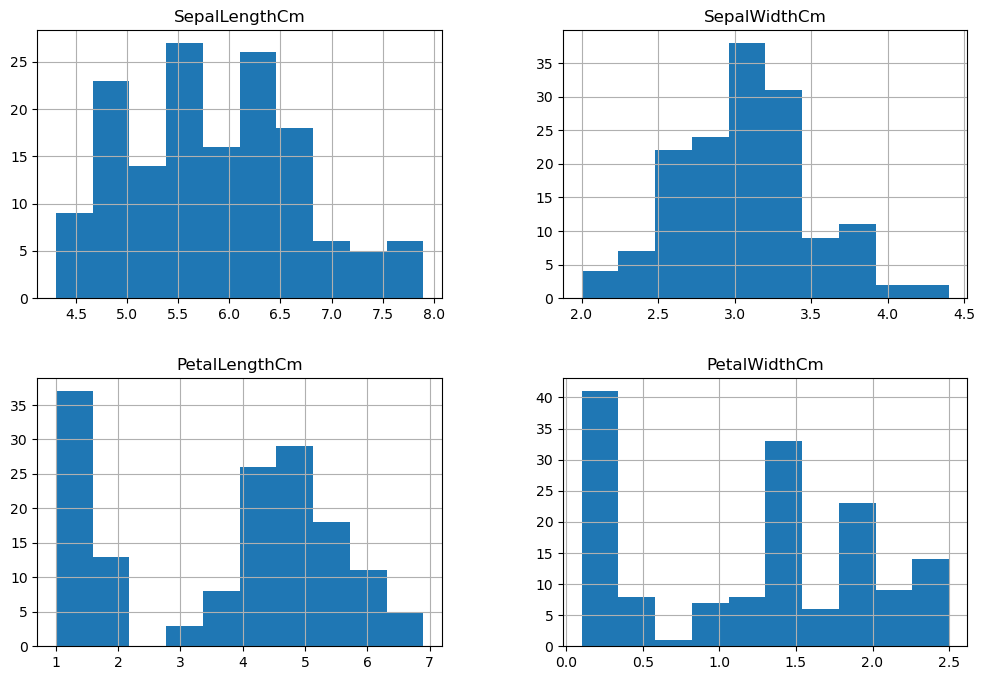

In [6]:
datos.hist(figsize=(12,8))
plt.show()

## **5. Distribucion de clases**

In [8]:
# Numero de registros por especie de iris
print(datos.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


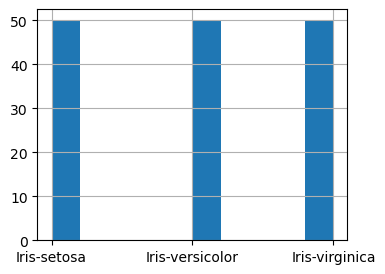

In [10]:
plt.figure(figsize=(4,3))
datos['Species'].hist()
plt.show()

## **6. Separacion de datos, para entrenamiento y test**

In [11]:
x = datos.drop(['Species'], axis=1)
y = datos['Species']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=41, train_size=0.7)
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
18,5.7,3.8,1.7,0.3
108,6.7,2.5,5.8,1.8
98,5.1,2.5,3.0,1.1
45,4.8,3.0,1.4,0.3
68,6.2,2.2,4.5,1.5


## **7. Entrenamiento de Naive Bayes**

 Scikit-learn ofrece diferentes implementaciones del algoritmo de clasificación de Naive Bayes. Estas variantes tienen diferencias en las suposiciones subyacentes y en las distribuciones de probabilidad que asumen para las características. Aquí están las principales diferencias entre las variantes:

**GaussianNB:** Este clasificador asume que las características siguen una distribución gaussiana (normal). Es adecuado para características continuas y numéricas. Cada clase se modela con una distribución gaussiana independiente con su propia media y varianza.

**MultinomialNB**: Este clasificador asume que las características tienen una distribución multinomial discreta. Es útil para datos discretos, como recuentos de palabras o frecuencias de categorías. Asume que cada característica es independiente de las demás, dada la clase, y modela la distribución de probabilidad utilizando la frecuencia relativa de cada valor de característica en cada clase.

**BernoulliNB:** Este clasificador asume que las características son binarias y siguen una distribución de Bernoulli. Es adecuado cuando solo importa la presencia o ausencia de una característica en lugar de su recuento. Similar a MultinomialNB, asume independencia entre características dada la clase.

**ComplementNB:** Este clasificador es una variante de MultinomialNB y se recomienda para conjuntos de datos desequilibrados. Asume que las características se distribuyen complementariamente, lo que lo hace adecuado para conjuntos de datos donde la clase dominante contiene información valiosa. Se utiliza una corrección complementaria para mejorar el rendimiento en clases minoritarias.

**CategoricalNB:** Este clasificador asume que las características son variables categóricas en lugar de numéricas. Utiliza una distribución multinomial de variables categóricas y puede manejar tanto características discretas como continuas. A diferencia de MultinomialNB, tiene en cuenta la correlación entre características categóricas.

In [12]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento
NaiveBayes.fit(x_train, y_train)

GaussianNB()

In [13]:
# Exactitud del entrenamiento
NaiveBayes.score(x_test, y_test)

0.9111111111111111

## **8. Prueba(test) del modelo**

In [14]:
# Datos de prueba
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
119,6.0,2.2,5.0,1.5
128,6.4,2.8,5.6,2.1
135,7.7,3.0,6.1,2.3
91,6.1,3.0,4.6,1.4
112,6.8,3.0,5.5,2.1


In [15]:
# Prediccion con los datos de test
pred = NaiveBayes.predict(x_test)
print(pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


## **9. Matriz de confusion y metricas**

In [16]:
# Dataframe con las etiqueta reales (y_test) y las generadas pro el modelo (pred)

# Crear una lista de tuplas con los valores de y_test y pred
resultados = list(zip(y_test, pred))

# Crear el Dataframe a partir de la lista de tuplas
df = pd.DataFrame(resultados, columns=['y_test', 'pred'])
df

,y_test,pred
0,Iris-virginica,Iris-versicolor
1,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-versicolor,Iris-versicolor
8,Iris-virginica,Iris-virginica
9,Iris-virginica,Iris-virginica


In [17]:
# Generar la matriz de confusion
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusion')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusion
[[11  0  0]
 [ 0 17  1]
 [ 0  3 13]]
Exactitud =  0.9111111111111111


## **10. Prediccion**

In [18]:
x_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [20]:
# Crear un data set con un nuevo registro; cuidando la estructura del data set de entrenamiento
nuevo = pd.DataFrame(data=[[1.7, 0.3, 5.7, 3.8]],
                     columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

pred = NaiveBayes.predict(nuevo)
pred

array(['Iris-virginica'], dtype='<U15')

In [22]:
# Prediccion directa
pred = NaiveBayes.predict([[1.7, 0.3, 5.7, 3.8]])
pred

c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype='<U15')

In [25]:
# Generacion aleatoria de 5 registros tomando en cuenta los minimos y maximos de cada atributo

# Generar cinco nuevos elementos dentro de rangos apropiados
elementos_nuevos = np.random.uniform(low=[4.3, 2.0, 1.0, 0.1], high=[7.9, 4.4, 6.9, 2.5], size=(5,4))

# Crear un DataFrame con los nuevos elementos y las columnas correspondientes
datos_nuevos = pd.DataFrame(elementos_nuevos, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Realizar la prediccion
pred = NaiveBayes.predict(datos_nuevos)
pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype='<U15')